In [2]:
import numpy as np
import pandas as pd
from sklearn import svm 
import seaborn as sns
import scipy.io as sio
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression

from time import time

# 不显示警告
import warnings
warnings.filterwarnings("ignore")

In [2]:
#***********************************linear kernel*************************************************

# 读取数据
mat = sio.loadmat('../data_wu/ex6data1.mat')
print(mat.keys())

print(mat.get('X')[0:5, :])
print(mat.get('y')[0:5, :])

print(type(mat.get('y')))

data = pd.DataFrame(mat.get('X'), columns = ('X1', 'X2'))
data['y'] = mat.get('y')

data.head()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
[[1.9643 4.5957]
 [2.2753 3.8589]
 [2.9781 4.5651]
 [2.932  3.5519]
 [3.5772 2.856 ]]
[[1]
 [1]
 [1]
 [1]
 [1]]
<class 'numpy.ndarray'>


,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


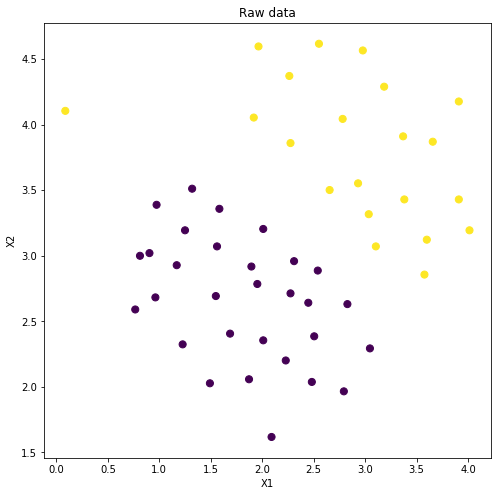

In [15]:
# visualization
fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(data['X1'], data['X2'], s = 50, c = data['y'])
ax.set_title('Raw data')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()

In [23]:
###  C = 1 ########
svc1 = svm.LinearSVC(C = 1, loss = 'hinge')
svc1.fit(data[['X1', 'X2']], data['y'])
print("Loss:%s"% svc1.loss)
print('Coefficients:%s, intercept %s'% (svc1.coef_, svc1.intercept_))
# print('Support Vectors: %s'% svc1.support_vectors_)
print('Score: %.5f' % svc1.score(data[['X1', 'X2']], data['y'])) #准确率 精度
# svc1.score()

Loss:hinge
Coefficients:[[0.5913657 0.8168192]], intercept [-4.11609146]
Score: 0.98039


In [25]:
data['SVM1 Confidentce'] = svc1.decision_function(data[['X1', 'X2']])

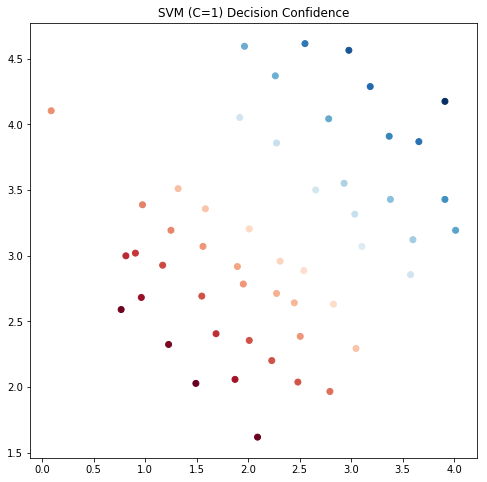

In [27]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(data['X1'], data['X2'], c = data['SVM1 Confidentce'], cmap='RdBu') # cmap渐变色，越小越浅
ax.set_title('SVM (C=1) Decision Confidence')
plt.show()



In [28]:
###### C = 100 ###########
svc100 = svm.LinearSVC(C = 100, loss = 'hinge')
svc100.fit(data[['X1', 'X2']], data['y'])
print("Loss:%s"% svc100.loss)
print('Coefficients:%s, intercept %s'% (svc100.coef_, svc100.intercept_))
# print('Support Vectors: %s'% svc1.support_vectors_)
print('Score: %.5f' % svc100.score(data[['X1', 'X2']], data['y'])) #准确率 精度
# svc1.score()

Loss:hinge
Coefficients:[[1.22993884 3.06469815]], intercept [-12.54155037]
Score: 1.00000


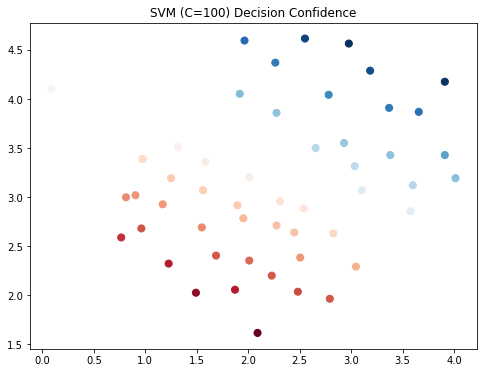

In [29]:
data['SVM100 Confidence'] = svc100.decision_function(data[['X1', 'X2']])
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM100 Confidence'], cmap='RdBu')
ax.set_title('SVM (C=100) Decision Confidence')
plt.show()

In [36]:
#***********************************Gaussian Kernels 1*************************************************

mat = sio.loadmat('../data_wu/ex6data2.mat')
print(mat.keys())

print(mat.get('X')[0:5, :])
print(mat.get('y')[0:5, :])


data = pd.DataFrame(mat.get('X'), columns = ('X1', 'X2'))
data['y'] = mat.get('y')

data.head()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
[[0.107143  0.60307  ]
 [0.093318  0.649854 ]
 [0.0979263 0.705409 ]
 [0.15553   0.784357 ]
 [0.210829  0.866228 ]]
[[1]
 [1]
 [1]
 [1]
 [1]]


,X1,X2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


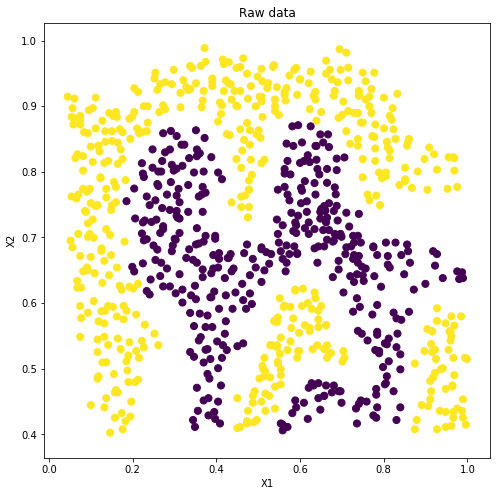

In [37]:
# visualization
fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(data['X1'], data['X2'], s = 50, c = data['y'])
ax.set_title('Raw data')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()

In [40]:
# gaussian function
def gaussian_kernel(x1, x2, sigma):
    # return np.exp(-np.dot(x1,x2)/(2*sigma*sigma))
    return np.exp(-np.power(x1 - x2, 2).sum()/(2 * (sigma**2)))

x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

gaussian_kernel(x1, x2, sigma)

0.32465246735834974

In [46]:
# svc kernel = gaussian
svc = svm.SVC(C = 100, kernel = 'rbf', gamma = 5, probability = True)
svc

svc.fit(data[['X1', 'X2']], data['y'])
print('Score: %.5f' % svc.score(data[['X1', 'X2']], data['y']))
print('Support Vectors: %s'% svc.support_vectors_)

Score: 0.93627
Support Vectors: [[0.37212  0.851608]
 [0.351382 0.863304]
 [0.3053   0.854532]
 [0.323733 0.841374]
 [0.289171 0.834064]
 [0.27765  0.829678]
 [0.31682  0.841374]
 [0.353687 0.834064]
 [0.420507 0.553363]
 [0.360599 0.828216]
 [0.450461 0.534357]
 [0.464286 0.538743]
 [0.471198 0.591374]
 [0.485023 0.598684]
 [0.480415 0.614766]
 [0.508065 0.63231 ]
 [0.514977 0.649854]
 [0.526498 0.660088]
 [0.558756 0.667398]
 [0.574885 0.674708]
 [0.593318 0.67617 ]
 [0.641705 0.66155 ]
 [0.678571 0.63962 ]
 [0.703917 0.616228]
 [0.726959 0.586988]
 [0.738479 0.557749]
 [0.779954 0.528509]
 [0.549539 0.692251]
 [0.531106 0.674708]
 [0.49424  0.65424 ]
 [0.634793 0.68348 ]
 [0.692396 0.664474]
 [0.736175 0.607456]
 [0.743088 0.594298]
 [0.747696 0.553363]
 [0.761521 0.543129]
 [0.644009 0.686404]
 [0.593318 0.674708]
 [0.464286 0.604532]
 [0.425115 0.528509]
 [0.480415 0.642544]
 [0.554147 0.679094]
 [0.692396 0.651316]
 [0.720046 0.641082]
 [0.567972 0.687865]
 [0.567972 0.66155 ]
 [

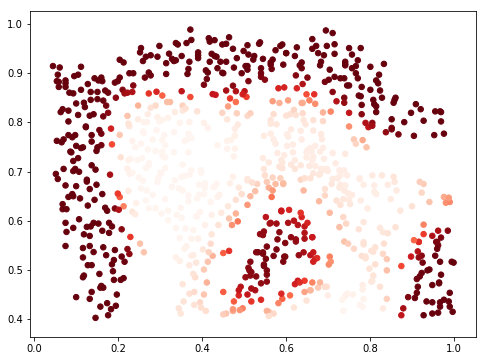

In [51]:
predict_prob = svc.predict_proba(data[['X1', 'X2']])# 输出分类概率
predict_prob[0:5, :]
# 选择分类概率中的第一列画图显示

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'], data['X2'], s=30, c = predict_prob[:, 1], cmap='Reds')
plt.show()

In [56]:
#***************************************寻找最优参数**********************************8

# 获取数据
mat = sio.loadmat('../data_wu/ex6data3.mat')
print(mat.keys())

print(mat.get('X')[0:5, :])
print(mat.get('y')[0:5, :])

# 训练集
train_data = pd.DataFrame(mat.get('X'), columns = ('X1', 'X2'))
train_data['y'] = mat.get('y')

train_data.head()

# 交叉验证集
cv = pd.DataFrame(mat.get('Xval'), columns = ('X1', 'X2'))
cv['yval'] = mat.get('yval')

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])
[[-0.158986  0.423977]
 [-0.347926  0.47076 ]
 [-0.504608  0.353801]
 [-0.596774  0.114035]
 [-0.518433 -0.172515]]
[[1]
 [1]
 [1]
 [1]
 [1]]


In [57]:
train_data.shape, cv.shape

((211, 3), (200, 3))

In [61]:
# 普通搜索
candidate = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
combination = [(C, gamma) for C in candidate for gamma in candidate]
len(combination)
print(combination[0:5])

[(0.01, 0.01), (0.01, 0.03), (0.01, 0.1), (0.01, 0.3), (0.01, 1)]


In [63]:
search = []

for C, gamma in combination:
    svc = svm.SVC(C = C, gamma = gamma)
    svc.fit(train_data[['X1','X2']], train_data['y'])
    search.append(svc.score(cv[['X1', 'X2']], cv['yval']))

len(search)

81

In [64]:
best_score = search[np.argmax(search)] #np.argmax返回的是行或者列最大值索引；这个返回的是最大score值
best_param = combination[np.argmax(search)] #最大值的参数，C和gamma

print(best_score, best_param)

0.965 (0.3, 100)


In [70]:
best_svc = svm.SVC(C = 100, gamma = 0.3)
best_svc.fit(train_data[['X1', 'X2']], train_data['y'])
predict = best_svc.predict(cv[['X1', 'X2']])

print(metrics.classification_report(cv['yval'], predict))

             precision    recall  f1-score   support

          0       0.92      0.96      0.94       113
          1       0.94      0.89      0.91        87

avg / total       0.93      0.93      0.92       200



In [77]:
## 使用GridSearchCV确定参数

parameters = {'C': candidate, 'gamma':candidate}
svc = svm.SVC()
t0 = time()
clf = GridSearchCV(svc, parameters, n_jobs = -1)
print('Grid Search time %0.3fs' % (time() - t0))

t1 = time()
clf.fit(train_data[['X1', 'X2']], train_data['y'])
print('train svm in %0.3fs' % (time() - t1))

Grid Search time 0.000s
train svm in 3.667s


In [78]:
clf.best_params_

{'C': 10, 'gamma': 30}

In [80]:
clf.best_score_

0.9004739336492891

In [82]:
ypred = clf.predict(cv[['X1', 'X2']])
print(metrics.classification_report(cv['yval'], ypred))

             precision    recall  f1-score   support

          0       0.95      0.96      0.96       113
          1       0.95      0.93      0.94        87

avg / total       0.95      0.95      0.95       200



In [3]:
# they are not the same result. What?
# It turns out that GridSearch will appropriate part of data as CV and use it to find the best candidate.
# So the reason for different result is just that GridSearch here is just using part of training data 
# to train because it need part of data as cv set

In [4]:
# **************************** spam filter **********************
mat_tr = sio.loadmat('../data_wu/spamTrain.mat')
print(mat_tr.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [6]:
print(mat_tr.get('X')[0:5, :])
print(mat_tr.get('y')[0:5, :])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[1]
 [1]
 [0]
 [0]
 [0]]


In [9]:
X, y = mat_tr.get('X'), mat_tr.get('y').ravel()
X.shape, y.shape

((4000, 1899), (4000,))

In [10]:
mat_test = sio.loadmat('../data_wu/spamTest.mat')
print(mat_test.keys())

dict_keys(['__header__', '__version__', '__globals__', 'Xtest', 'ytest'])


In [11]:
X_test, y_test = mat_test.get('Xtest'), mat_test.get('ytest').ravel()
X_test.shape, y_test.shape

((1000, 1899), (1000,))

In [12]:
svc = svm.SVC()
svc.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
pred = svc.predict(X_test)
print(metrics.classification_report(y_test, pred))

print(svc.score(X, y))

             precision    recall  f1-score   support

          0       0.94      0.99      0.97       692
          1       0.98      0.87      0.92       308

avg / total       0.95      0.95      0.95      1000

0.944


In [14]:
# logistic
logit = LogisticRegression()
logit.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
pred = logit.predict(X_test)
print(metrics.classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      0.99      1.00       692
          1       0.99      0.99      0.99       308

avg / total       0.99      0.99      0.99      1000

